#### Задание.

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)  
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety   
Разделите данные на выборку для обучения и тестирования  
Постройте модель LDA  
Визуализируйте предсказания для тестовой выборки и центры классов  
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width  
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [5]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [7]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [9]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
data.rename(columns={'sepal length (cm)': 'длина чашелистика (см)', 'sepal width (cm)': 'ширина чашелистика (см)', 'petal length (cm)':'длина лепестка (см)', 'petal width (cm)':'ширина лепестка (см)'
                     },
                     inplace=True)

data

,длина чашелистика (см),ширина чашелистика (см),длина лепестка (см),ширина лепестка (см)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
data.rename(columns={'sepal length (cm)': 'длина чашелистика (см)', 'sepal width (cm)': 'ширина чашелистика (см)'
                     },
                     inplace=True)

data

,длина чашелистика (см),ширина чашелистика (см),длина лепестка (см),ширина лепестка (см)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
# Оставляем для анализа два признака - sepal_length (длина чашелистика) и sepal_width (ширина чашелистика) 

iris1 = data[['длина чашелистика (см)', 'ширина чашелистика (см)']] 
iris1.head()

,длина чашелистика (см),ширина чашелистика (см)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [13]:
iris1_class = data_class
iris1_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [15]:
len(y_test)                         # проверяем, сколько у нас осталось позиций для теста

38

In [23]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
lda = LinearDiscriminantAnalysis()

In [25]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [26]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2])

In [27]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [28]:
result

,0,1
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,2,2
8,0,0
9,1,1


In [29]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test, lda.predict(X_test)) # коэффициент точности модели

0.9473684210526315

Коэффициент точности модели равен 0.947368 что говорит о том, что модель определяет данны с точностью 94,74%

In [31]:
# коэффициенты дискриминатных линий
lda.coef_

array([[  4.39921262,  15.68893087, -16.10077268, -23.62152492],
       [ -1.27744745,  -5.67669659,   4.85174261,   4.86099358],
       [ -3.67722711, -11.92912746,  13.27189801,  21.85726384]])

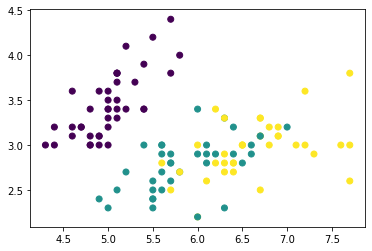

In [32]:
# визуализируем дискриминантную линию по 2 признакам (длина и ширина чашелистика)
plt.scatter(X_train['длина чашелистика (см)'], X_train['ширина чашелистика (см)'], c=y_train)
plt.show()

In [33]:
small_train = X_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_train = small_train[['длина чашелистика (см)', 'ширина чашелистика (см)']]
sy_train = y_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 1) | (y_test == 2)]
small_test = small_test[['длина чашелистика (см)', 'ширина чашелистика (см)']]
sy_test = y_test[(y_test == 0) | (y_test == 1) | (y_test == 2)]

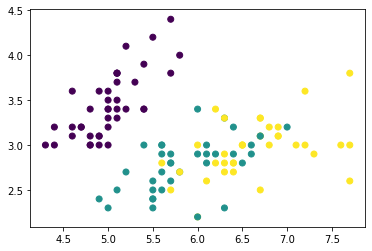

In [34]:
plt.scatter(small_train['длина чашелистика (см)'], small_train['ширина чашелистика (см)'], c=sy_train)
plt.show()

In [35]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [36]:
# посмотрим на центроиды
lda_small.means_

array([[5.01      , 3.445     ],
       [5.88378378, 2.78108108],
       [6.63142857, 2.96285714]])

In [37]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

<ipython-input-45-9a30949d41bf>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


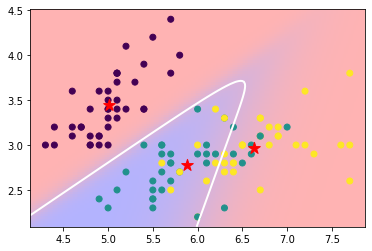

In [45]:
# сам scatter plot
plt.scatter(small_train['длина чашелистика (см)'], small_train['ширина чашелистика (см)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [47]:
lda_small.coef_

array([[-6.8916531 ,  8.8753233 ],
       [ 1.97723795, -4.26082246],
       [ 5.785952  , -5.6389286 ]])

In [48]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

0.6842105263157895

In [49]:
data[['длина чашелистика (см)', 'ширина чашелистика (см)']].corr()

,длина чашелистика (см),ширина чашелистика (см)
длина чашелистика (см),1.00000,-0.11757
ширина чашелистика (см),-0.11757,1.00000


Коэффициент показывает низкю корреляцию между признаками, что хорошо для модели

In [50]:
# Анализ на основе логистической регрессии

from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression()

In [52]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [53]:
lr.predict_proba(small_test)

array([[3.37153361e-03, 2.13145264e-01, 7.83483203e-01],
       [9.08514248e-01, 7.78810984e-02, 1.36046537e-02],
       [9.46128312e-01, 4.91688362e-02, 4.70285140e-03],
       [5.39922609e-03, 5.29532887e-01, 4.65067887e-01],
       [9.37930398e-01, 4.50355838e-02, 1.70340184e-02],
       [9.06372679e-01, 9.04789130e-02, 3.14840827e-03],
       [6.19607707e-02, 8.83124696e-01, 5.49145336e-02],
       [1.24168027e-03, 1.29484686e-01, 8.69273634e-01],
       [9.31343070e-01, 5.99289993e-02, 8.72793059e-03],
       [5.70402809e-03, 2.91234218e-01, 7.03061754e-01],
       [9.69717415e-01, 2.83948194e-02, 1.88776577e-03],
       [8.78634183e-01, 1.00341689e-01, 2.10241282e-02],
       [2.42006864e-02, 3.38863977e-01, 6.36935337e-01],
       [1.47151018e-04, 1.14961382e-01, 8.84891467e-01],
       [8.83422068e-01, 8.71506198e-02, 2.94273122e-02],
       [1.10546657e-01, 5.68882356e-01, 3.20570987e-01],
       [3.46024160e-01, 6.11851498e-01, 4.21243418e-02],
       [1.98599111e-01, 5.75848

In [54]:
lr.predict(small_test)

array([2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1])

In [55]:
accuracy_score(sy_test, lr.predict(small_test))

0.7368421052631579

In [56]:
lr.coef_

array([[-2.51846887,  2.21106848],
       [ 0.34993016, -1.38921962],
       [ 2.1685387 , -0.82184886]])

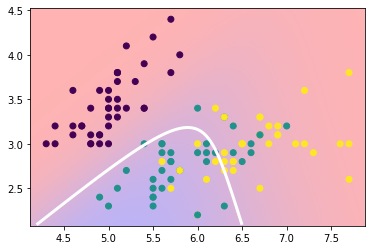

In [57]:
plt.scatter(small_train['длина чашелистика (см)'], small_train['ширина чашелистика (см)'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1., 2.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=3., colors='white')

plt.show()

### Кластеризация

In [58]:
from sklearn.cluster import KMeans

In [59]:
flowers = iris1.to_numpy()
flowers

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

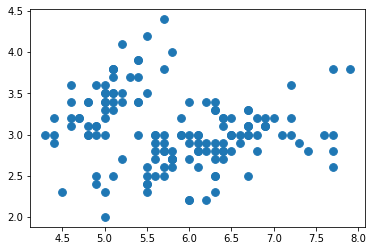

In [60]:
plt.scatter(flowers[:, 0], flowers[:, 1], cmap='autumn', s=60)

In [61]:
# указываем количество кластеров - 3
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(flowers)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

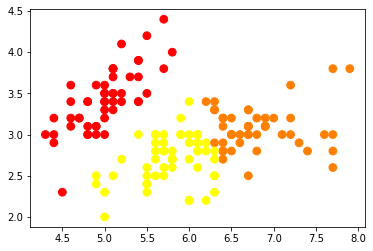

In [62]:
plt.scatter(flowers[:, 0], flowers[:, 1], cmap='autumn', c=clusters, s=60)

In [63]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(flowers)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

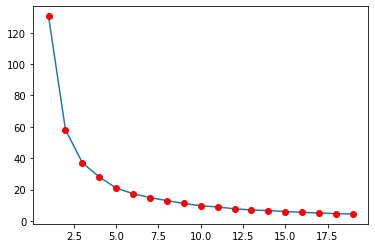

In [64]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

##### По графику локтя видим, что делить на 3 класса наиболее правильно.